In [1]:
%matplotlib inline
import numpy as np
import torch
import helper
import matplotlib.pyplot as plt

In [2]:
from torchvision import datasets, transforms
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,)),
                               ])

In [3]:
trainset = datasets.MNIST('MNIST_data/',download = True,train = True,transform = transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size = 64,shuffle = True)

In [4]:
dataiter = iter(trainloader)
images,labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


torch.Size([1, 28, 28])


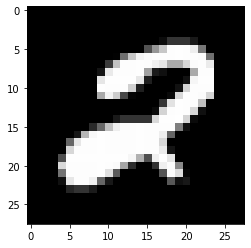

In [5]:
print(images[1].shape)
plt.imshow(images[1].numpy().squeeze(),cmap = 'Greys_r')

In [6]:

class FFlayer(torch.nn.Module):

    def __init__(self, input_dim, output_dim):    
        super(FFlayer, self).__init__()
        self.input_dim = input_dim
        #if self.input_dim != output_dim * 2:
        #    raise Exception("Invalid dimensional input for flipflop layer")
        self.output_dim = output_dim
          
    def forward(self, data, vstate):
        #if vstate.shape[1] != self.output_dim * 2:
        #    raise Exception("Invalid dimensional input for flipflop layer")    
        s = data[: , [col % 2 == 0 for col in range(data.shape[1])]].clone().detach().numpy()
        r = data[: , [col % 2 != 0 for col in range(data.shape[1])]].clone().detach().numpy()
        vstate = vstate.clone().detach().numpy()
        return torch.tensor(vstate - 2 * s + 0.5 * r + 0.5)

In [7]:
from torch import nn
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(784,256)
        self.hidden2 = FFlayer(256,128)
        self.output = nn.Linear(128,10)
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax()
    def forward(self,x):
        print("Initial:",x.shape)
        x = self.hidden1(x)
        print("hidden1 X:", x.shape)
        vstate = torch.zeros(size = (64, 128))
        print("vstate", vstate.shape)
        x = self.hidden2(x, vstate)
        print("hidden2 X:", x.shape)
        x = self.output(x)
        print("output:", x.shape)
        x = self.sigmoid(x)
        print("sigmoid X", x.shape)
        x = self.softmax(x)
        print("softmax X:", x.shape)
        #break
        return x

In [8]:
model = Network()
model

Network(
  (hidden1): Linear(in_features=784, out_features=256, bias=True)
  (hidden2): FFlayer()
  (output): Linear(in_features=128, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=None)
)

In [9]:
from torch import optim
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(),lr = 0.03)

In [10]:
for images,labels in trainloader:
        images = images.view(images.shape[0],-1)
        optimizer.zero_grad()
        out1 = model.forward(images)
        #loss = criterion(out1,labels)
        #loss.backward()
        #optimizer.step()
        #running_loss += loss.item()
        break
    #else:
     #   print(f"Training loss:{running_loss / len(trainloader)}")

Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])


C:\Users\pAndu\Anaconda3\envs\PyTorch\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


softmax X: torch.Size([64, 10])


In [ ]:
for images,labels in trainloader:
    images = images.view(images.shape[0],-1)
    optimizer.zero_grad()
    out1 = model.forward(images)
    #print("out1 size:", out1.shape)
    #print("label size:", labels.shape)
    #break
    #loss = criterion(out1,labels)
    #loss.backward()
    #optimizer.step()
    #running_loss += loss.item()
    break
else:
    print(f"Training loss:{running_loss / len(trainloader)}")

In [ ]:
for images,labels in trainloader:
    images = images.view(images.shape[0],-1)
    optimizer.zero_grad()
    out1 = model.forward(images)
    #print("out1 size:", out1.shape)
    #print("label size:", labels.shape)
    #break
    #loss = criterion(out1,labels)
    #loss.backward()
    #optimizer.step()
    #running_loss += loss.item()
    break
else:
    print(f"Training loss:{running_loss / len(trainloader)}")

In [11]:
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(),lr = 0.03)
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images,labels in trainloader:
        images = images.view(images.shape[0],-1)
        optimizer.zero_grad()
        out1 = model.forward(images)
        loss = criterion(out1,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss:{running_loss / len(trainloader)}")

Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])


C:\Users\pAndu\Anaconda3\envs\PyTorch\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hid

hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Ini

Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
ou

output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidde

hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigm

sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
v

vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softma

softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hid

hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Ini

Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
ou

output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidde

hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigm

sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
v

vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softma

softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hid

hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Ini

Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
ou

output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidde

hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigm

sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
v

vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softma

softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hid

hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Ini

Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
ou

output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidden1 X: torch.Size([64, 256])
vstate torch.Size([64, 128])
hidden2 X: torch.Size([64, 128])
output: torch.Size([64, 10])
sigmoid X torch.Size([64, 10])
softmax X: torch.Size([64, 10])
Initial: torch.Size([64, 784])
hidde

ValueError: operands could not be broadcast together with shapes (64,128) (32,128) 